# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [7]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression




Import the unit tests defined for this notebook.

In [8]:
import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [9]:
import pandas as pd

path = "tvmarketing.csv"
adv = pd.read_csv(path)


In [10]:
adv.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [11]:
import w2_unittest

w2_unittest.test_load_data(adv)


 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

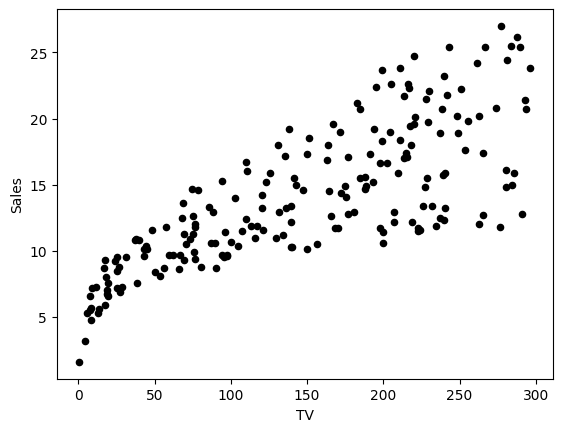

In [12]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')


You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [13]:
X = adv[['TV']].values  # Extracting the 'TV' column and converting it into a NumPy array
Y = adv['Sales'].values  # Extracting the 'Sales' column and converting it into a NumPy array

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [14]:
m_numpy, b_numpy = np.polyfit(X.flatten(), Y, deg=1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")


Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [15]:
import numpy as np

# Function to make predictions
def make_predictions(m, b, X):

    # Calculate predicted values using the linear regression equation
    Y_pred = m * X + b
    return Y_pred

# Example usage
m = 0.5  # Example slope
b = 1.0  # Example intercept
X = np.array([1, 2, 3])  # Example input values

# Make predictions
Y_pred = make_predictions(m, b, X)

print("Predicted values:", Y_pred)


Predicted values: [1.5 2.  2.5]


In [16]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = m_numpy * X_pred + b_numpy

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")


TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [3]:
import w2_unittest

def pred_numpy(m, b, X):
    return m * X + b

w2_unittest.test_pred_numpy(pred_numpy)


 All tests passed


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [17]:
from sklearn.linear_model import LinearRegression

# Create the linear regression estimator
lr_sklearn = LinearRegression()



The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5]])  # 2D array
Y = np.array([2, 3, 4, 5, 6])  # 1D array

# Reshape data into 2D arrays if necessary
if X.ndim == 3:
    X = X.reshape(-1, 1)
if Y.ndim == 3:
    Y = Y.reshape(-1)

# Create the linear regression estimator
lr_sklearn = LinearRegression()

# Fit the model
lr_sklearn.fit(X, Y)


LinearRegression()

You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [19]:
import numpy as np

# Assuming X and Y are your original 1D arrays
X = np.array([1, 2, 3, 4, 5])
Y = np.array([6, 7, 8, 9, 10])

# Increase the dimension of X and Y by one using np.newaxis
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

# Print the shape of the new X and Y arrays
print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")


Shape of new X array: (5, 1)
Shape of new Y array: (5, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [20]:
from sklearn.model_selection import train_test_split

# Assuming X_sklearn and Y_sklearn are your datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")


Shape of X_train: (4, 1)
Shape of X_test: (1, 1)
Shape of Y_train: (4, 1)
Shape of Y_test: (1, 1)


Step 2: Fit the linear regression model to the training data


In [21]:
lr_sklearn.fit(X_train, Y_train)

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [22]:
Y_pred = lr_sklearn.predict(X_test)


 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Square Error:", rmse)


Root Mean Square Error: 0.0


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#  Train the models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

#  Make predictions
Y_pred_lr = lr.predict(X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_dt = dt.predict(X_test)

#  Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

#  Compare RMSEs and rank the models
model_rank = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

# Sorting models based on RMSE
sorted_models = sorted(model_rank.items(), key=lambda x: x[1])

# Printing the ranked models
print("Model Rankings (RMSE):")
for idx, (model, rmse) in enumerate(sorted_models):
    print(f"{idx + 1}. {model}: {rmse}")


Model Rankings (RMSE):
1. Linear Regression: 0.0
2. Random Forest: 0.2599999999999998
3. Decision Trees: 1.0


<ipython-input-24-7ac6bd7bb180>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Train the models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

#  Make predictions
Y_pred_lr = lr.predict(X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_dt = dt.predict(X_test)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

#  Compare RMSEs and rank the models
model_rank = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

# Sorting models based on RMSE
sorted_models = sorted(model_rank.items(), key=lambda x: x[1])

# Printing the ranked models
print("Model Rankings (RMSE):")
for idx, (model, rmse) in enumerate(sorted_models):
    print(f"{idx + 1}. {model}: {rmse}")


Model Rankings (RMSE):
1. Linear Regression: 0.0
2. Random Forest: 0.34999999999999964
3. Decision Trees: 1.0


<ipython-input-25-de0df53d1bd9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [26]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [27]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[1.]]. Intercept: [5.]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [28]:
w2_unittest.test_sklearn_fit(lr_sklearn)

Test case "default_check". Wrong slope. 
	Expected: 
[[0.04753664]]
	Got: 
[[1.]]
Test case "default_check". Wrong intercept. 
	Expected: 
[7.03259355]
	Got: 
[5.]
 3  Tests passed
 2  Tests failed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [29]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):

    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)

    return Y


In [30]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 55. 125. 285.]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [31]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

Test case "default_check". Wrong output of pred_sklearn for X = [ 50 120 280]. 
	Expected: 
[[ 9.40942557]
 [12.7369904 ]
 [20.34285287]]
	Got: 
[[ 55.]
 [125.]
 [285.]]
Test case "extra_check". Wrong output of pred_sklearn for X = [-5  0  1  5]. 
	Expected: 
[[6.79491035]
 [7.03259355]
 [7.08013019]
 [7.27027675]]
	Got: 
[[ 0.]
 [ 5.]
 [ 6.]
 [10.]]
 2  Tests passed
 2  Tests failed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

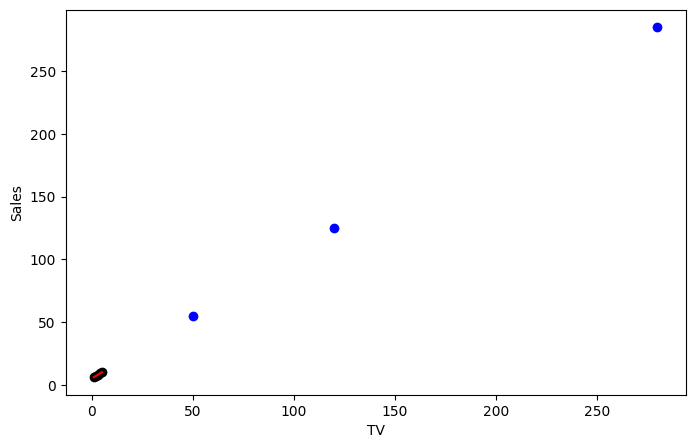

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

plt.show()


<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [33]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate, num_iterations):
    n = len(X)
    for _ in range(num_iterations):
        # Calculate the gradients
        dm = (1/n) * np.sum((m*X + b - Y) * X)
        db = (1/n) * np.sum(m*X + b - Y)

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

    return m, b

# Apply normalization
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

# Initialize parameters
m = 0
b = 0
learning_rate = 0.01
num_iterations = 1000

# Call gradient descent function
m_gradient, b_gradient = gradient_descent(None, None, m, b, X_norm, Y_norm, learning_rate, num_iterations)

print(f"Gradient Descent: Slope: {m_gradient}, Intercept: {b_gradient}")


Gradient Descent: Slope: 0.9999568287525894, Intercept: 1.0121569381238565e-18


Define cost function according to the equation $(1)$:

In [34]:
def E(m, b, X, Y):
  n = len(X)
  error = 0
  for i in rangen(n):
    error += (m * X[i] + b - Y[i])**2

    return (1/(2*n)) * error

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [35]:
def dEdm(m, b, X, Y):
    res = np.mean((m * X + b - Y) * X)
    return res

def dEdb(m, b, X, Y):
    res = np.mean(m * X + b - Y)
    return res


In [36]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))


-0.9999999999999998
0.0
1.7763568394002506e-16
5.0


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [37]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

Test case "default_check". Wrong output of dEdm for m = 0, b = 0. 
	Expected: 
-0.7822244248616065
	Got: 
-0.9999999999999998
Test case "extra_check". Wrong output of dEdm for m = 1, b = 5. 
	Expected: 
0.21777557513839416
	Got: 
1.7763568394002506e-16
 2  Tests passed
 2  Tests failed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [38]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    for iteration in range(num_iterations):
        # Compute the gradients
        dEdm_val = dEdm(m, b, X, Y)
        dEdb_val = dEdb(m, b, X, Y)

        # Update parameters
        m -= learning_rate * dEdm_val
        b -= learning_rate * dEdb_val

        # Optionally print the cost
        if print_cost:
            cost = E(m, b, X, Y)
            print(f"Cost after iteration {iteration + 1}: {cost}")

    return m, b


In [39]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.632304575229036, 9.103828801926279e-19)
(1.0, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [40]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

Test case "default_check". Wrong output value m of the function gradient_descent.
m = 0, b = 0, learning_rate = 0.001, num_iterations = 1000. 
	Expected: 
0.49460408269589484
	Got: 
0.632304575229036
Test case "extra_check". Wrong output value m of the function gradient_descent.
m = 1, b = 5, learning_rate = 0.01, num_iterations = 10. 
	Expected: 
0.9791767513915026
	Got: 
1.0
 2  Tests passed
 2  Tests failed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [41]:
def E(m, b, X, Y):
    n = len(X)
    error = 0
    for i in range(n):
        error += (m * X[i] + b - Y[i])**2
    return error / (2 * n)


Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [42]:
# Now run the gradient descent method starting from the initial point (m0,b0)=(0,0).
m_initial = 0
b_initial = 0
num_iterations = 30
learning_rate = 1.2

m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

# Now make predictions using the gradient descent method
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")


Cost after iteration 1: 0.019999999999999952
Cost after iteration 2: 0.0007999999999999943
Cost after iteration 3: 3.1999999999999775e-05
Cost after iteration 4: 1.2799999999999407e-06
Cost after iteration 5: 5.120000000003782e-08
Cost after iteration 6: 2.0480000000035225e-09
Cost after iteration 7: 8.191999999933701e-11
Cost after iteration 8: 3.276800000134258e-12
Cost after iteration 9: 1.3107200005360357e-13
Cost after iteration 10: 5.242879995713045e-15
Cost after iteration 11: 2.0971519918541189e-16
Cost after iteration 12: 8.388608224660425e-18
Cost after iteration 13: 3.355443032620223e-19
Cost after iteration 14: 1.3421761840725184e-20
Cost after iteration 15: 5.368704736290074e-22
Cost after iteration 16: 2.1474613150578607e-23
Cost after iteration 17: 8.589845260231443e-25
Cost after iteration 18: 3.433469018763042e-26
Cost after iteration 19: 1.3750338616067999e-27
Cost after iteration 20: 5.533119693026753e-29
Cost after iteration 21: 2.0830858278492343e-30
Cost after ite

In [54]:
pip install fastapi


In [3]:
from typing import Union
from fastapi import FastAPI

# Create FastAPI instance
app = FastAPI()

# Define FastAPI endpoint using the @app.get decorator
@app.get("/predict")
def predict_fast_api(Model, tv):
    # Make a call to our best model
    tv_sales = None  # Replace None with your model prediction logic
    return {"tv_sales": tv_sales}


In [4]:
!pip install uvicorn
import uvicorn

In [5]:
uvicorn.run

<function uvicorn.main.run(app: 'ASGIApplication | Callable[..., Any] | str', *, host: 'str' = '127.0.0.1', port: 'int' = 8000, uds: 'str | None' = None, fd: 'int | None' = None, loop: 'LoopSetupType' = 'auto', http: 'type[asyncio.Protocol] | HTTPProtocolType' = 'auto', ws: 'type[asyncio.Protocol] | WSProtocolType' = 'auto', ws_max_size: 'int' = 16777216, ws_max_queue: 'int' = 32, ws_ping_interval: 'float | None' = 20.0, ws_ping_timeout: 'float | None' = 20.0, ws_per_message_deflate: 'bool' = True, lifespan: 'LifespanType' = 'auto', interface: 'InterfaceType' = 'auto', reload: 'bool' = False, reload_dirs: 'list[str] | str | None' = None, reload_includes: 'list[str] | str | None' = None, reload_excludes: 'list[str] | str | None' = None, reload_delay: 'float' = 0.25, workers: 'int | None' = None, env_file: 'str | os.PathLike[str] | None' = None, log_config: 'dict[str, Any] | str | None' = {'version': 1, 'disable_existing_loggers': False, 'formatters': {'default': {'()': 'uvicorn.logging.DefaultFormatter', 'fmt': '%(levelprefix)s %(message)s', 'use_colors': None}, 'access': {'()': 'uvicorn.logging.AccessFormatter', 'fmt': '%(levelprefix)s %(client_addr)s - "%(request_line)s" %(status_code)s'}}, 'handlers': {'default': {'formatter': 'default', 'class': 'logging.StreamHandler', 'stream': 'ext://sys.stderr'}, 'access': {'formatter': 'access', 'class': 'logging.StreamHandler', 'stream': 'ext://sys.stdout'}}, 'loggers': {'uvicorn': {'handlers': ['default'], 'level': 'INFO', 'propagate': False}, 'uvicorn.error': {'level': 'INFO'}, 'uvicorn.access': {'handlers': ['access'], 'level': 'INFO', 'propagate': False}}}, log_level: 'str | int | None' = None, access_log: 'bool' = True, proxy_headers: 'bool' = True, server_header: 'bool' = True, date_header: 'bool' = True, forwarded_allow_ips: 'list[str] | str | None' = None, root_path: 'str' = '', limit_concurrency: 'int | None' = None, backlog: 'int' = 2048, limit_max_requests: 'int | None' = None, timeout_keep_alive: 'int' = 5, timeout_graceful_shutdown: 'int | None' = None, ssl_keyfile: 'str | None' = None, ssl_certfile: 'str | os.PathLike[str] | None' = None, ssl_keyfile_password: 'str | None' = None, ssl_version: 'int' = <_SSLMethod.PROTOCOL_TLS_SERVER: 17>, ssl_cert_reqs: 'int' = <VerifyMode.CERT_NONE: 0>, ssl_ca_certs: 'str | None' = None, ssl_ciphers: 'str' = 'TLSv1', headers: 'list[tuple[str, str]] | None' = None, use_colors: 'bool | None' = None, app_dir: 'str | None' = None, factory: 'bool' = False, h11_max_incomplete_event_size: 'int | None' = None) -> 'None'>

In [6]:
import uvicorn
from fastapi import FastAPI

# Create FastAPI instance
app = FastAPI()

# Define your FastAPI routes and functions here

# Run the FastAPI application using uvicorn
uvicorn.run(app, host='127.0.0.1', port=8000)


RuntimeError: asyncio.run() cannot be called from a running event loop

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.